In [1]:
import sys
import os
import os.path as osp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LogNorm

sys.path.insert(0,'..')
import pyathena as pa

__LoadSim class__

In [2]:
help(pa.LoadSim)

Help on class LoadSim in module pyathena.load_sim:

class LoadSim(builtins.object)
 |  LoadSim(basedir, savdir=None, load_method='pyathena', verbose=True)
 |  
 |  Class to prepare Athena simulation data analysis. Read input parameters,
 |  find simulation output (vtk, starpar_vtk, hst, sn, zprof) files.
 |  
 |  Properties
 |      basedir : str
 |          base directory of simulation output
 |      basename : str
 |          basename (tail) of basedir
 |      files : dict
 |          output file paths for vtk, starpar, hst, sn, zprof
 |      problem_id : str
 |          prefix for (vtk, starpar, hst, zprof) output
 |      par : dict
 |          input parameters and configure options read from log file
 |      ds : AthenaDataSet or yt DataSet
 |          class for reading vtk file
 |      domain : dict
 |          info about dimension, cell size, time, etc.
 |      load_method : str
 |          'pyathena' or 'yt' or 'pyathenaclassic'
 |      num : list of int
 |          vtk output nu

In [3]:
s = pa.LoadSim('/perseus/scratch/gpfs/jk11/GC_WIND/test/')

LoadSim-INFO: savdir : /perseus/scratch/gpfs/jk11/GC_WIND/test
LoadSim-INFO: basedir: /perseus/scratch/gpfs/jk11/GC_WIND/test
LoadSim-INFO: athinput: /perseus/scratch/gpfs/jk11/GC_WIND/test/out.txt
LoadSim-INFO: problem_id: cloud
LoadSim-INFO: hst: /perseus/scratch/gpfs/jk11/GC_WIND/test/id0/cloud.hst
LoadSim-INFO: sn: /perseus/scratch/gpfs/jk11/GC_WIND/test/id0/cloud.sn
LoadSim-INFO: vtk in id0: /perseus/scratch/gpfs/jk11/GC_WIND/test/id0 nums: 0-100
LoadSim-INFO: timeit: /perseus/scratch/gpfs/jk11/GC_WIND/test/timeit.txt


In [4]:
# Read without verbose message
s = pa.LoadSim('/perseus/scratch/gpfs/jk11/GC_WIND/test/', verbose=False)

In [5]:
s.print_all_properties()

Attributes:
 ['basedir', 'basename', 'load_method', 'loglevel_def', 'logger', 'savdir', '_out_fmt_def', 'files', 'par', 'out_fmt', 'problem_id', 'nums', 'nums_id0', 'domain']

Methods:
Decorators: Class containing a collection of decorators for fast reading of 
        analysis output, (reprocessed) hst, and zprof. Used in child class.
        
-------------------------
_find_files: Function to find all output files under basedir and create "files" dictionary.

        hst: problem_id.hst
        sn: problem_id.sn (file format identical to hst)
        vtk: problem_id.num.vtk
        starpar_vtk: problem_id.num.starpar.vtk
        zprof: problem_id.num.phase.zprof
        timeit: timtit.txt
        
-------------------------
_get_domain_from_par: Get domain info from par['domain1']. Time is set to None.
        
-------------------------
_get_fvtk: Get vtk file path
        
-------------------------
_get_logger: Function to set logger and default verbosity.

        Parameters
       

In [6]:
print(s.basedir, s.basename, s.load_method, s.problem_id)

/perseus/scratch/gpfs/jk11/GC_WIND/test test pyathena cloud


In [7]:
print(s.files.keys())

dict_keys(['athinput', 'hst', 'sn', 'vtk', 'vtk_id0', 'timeit'])


In [8]:
s.files['hst']

'/perseus/scratch/gpfs/jk11/GC_WIND/test/id0/cloud.hst'

In [9]:
print(s.par.keys())

dict_keys(['log', 'job', 'output1', 'output2', 'time', 'domain1', 'problem', 'feedback', 'configure'])


In [10]:
s.par['domain1']

{'level': 0,
 'Nx1': 128,
 'x1min': -20.0,
 'x1max': 20.0,
 'bc_ix1': 2,
 'bc_ox1': 2,
 'Nx2': 128,
 'x2min': -20.0,
 'x2max': 20.0,
 'bc_ix2': 2,
 'bc_ox2': 2,
 'Nx3': 128,
 'x3min': -20.0,
 'x3max': 20.0,
 'bc_ix3': 2,
 'bc_ox3': 2,
 'NGrid_x1': 4,
 'NGrid_x2': 4,
 'NGrid_x3': 4,
 'AutoWithNProc': 64}

In [11]:
s.domain # le/re: left/right edge

{'ndim': 3,
 'Nx': array([128, 128, 128]),
 'le': array([-20., -20., -20.]),
 're': array([20., 20., 20.]),
 'Lx': array([40., 40., 40.]),
 'dx': array([0.3125, 0.3125, 0.3125]),
 'center': array([0., 0., 0.]),
 'time': None}

#### Read hst using read_hst "function"

In [12]:
hst = pa.read_hst(s.files['hst']) # pandas DataFrame
hst.columns

Index(['time', 'dt', 'mass', 'totalE', 'x1Mom', 'x2Mom', 'x3Mom', 'x1KE',
       'x2KE', 'x3KE', 'gravPE', 'scalar0'],
      dtype='object')

In [13]:
hst.head()

,time,dt,mass,totalE,x1Mom,x2Mom,x3Mom,x1KE,x2KE,x3KE,gravPE,scalar0
0,0.000000,0.008692,5.066233,35.747995,0.122991,0.013391,-0.04487,4.256569,3.985544,3.190574,-25.958686,0.101325
1,0.016177,0.007964,5.066233,20.359936,0.122991,0.013391,-0.04487,4.259500,3.979803,3.198999,-25.948980,0.101325
2,0.024141,0.007455,5.066234,17.298639,0.122991,0.013391,-0.04487,4.257931,3.980650,3.200918,-25.944781,0.101325
3,0.031596,0.007498,5.066235,15.848075,0.122991,0.013391,-0.04487,4.255165,3.981731,3.201279,-25.941030,0.101325
4,0.046823,0.007476,5.066237,14.888028,0.122991,0.013391,-0.04487,4.248077,3.984087,3.200108,-25.933725,0.101325


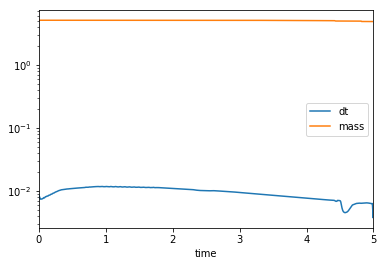

In [14]:
ax = hst.plot('time',y=['dt','mass']) # dt_mhd and gas mass in code units
ax.set_yscale('log')

In [15]:
print(s.nums) # all vtk file numbers (starts from 0)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


__One can laod vtk file using ``ds = pa.read_vtk(s.files['vtk_id0'][num])``, but more conveniently__

In [16]:
num = s.nums[30]
ds = s.load_vtk(num=num)

In [17]:
help(ds)

Help on AthenaDataSet in module pyathena.io.read_vtk object:

class AthenaDataSet(builtins.object)
 |  AthenaDataSet(filename, id0_only=False)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, filename, id0_only=False)
 |      Class to read athena vtk file.
 |      
 |      Parameters
 |      ----------
 |      filename : string
 |          Name of the file to open, including extension
 |      id0_only : bool
 |          Flag to enforce to read vtk file in id0 directory only.
 |          Default value is False.
 |  
 |  get_cc_pos(self)
 |      Compute cell center positions
 |      
 |      Returns
 |      -------
 |      xc : numpy array
 |          Unique cell-centered cooridnates
 |  
 |  get_field(self, field='density', le=None, re=None, as_xarray=False)
 |      Read fields data.
 |      
 |      Parameters
 |      ----------
 |      field : (list of) string
 |          The name of the field(s) to be read.
 |      le : sequence of floats
 |         Left edge. Default value is 

In [18]:
ds.domain

{'all_grid_equal': True,
 'ngrid': 64,
 'le': array([-20., -20., -20.], dtype=float32),
 're': array([20., 20., 20.], dtype=float32),
 'dx': array([0.3125, 0.3125, 0.3125], dtype=float32),
 'Lx': array([40., 40., 40.], dtype=float32),
 'center': array([0., 0., 0.], dtype=float32),
 'Nx': array([128, 128, 128]),
 'ndim': 3,
 'time': 1.508373}

__get_field(): read 3d fields__

In [19]:
help(ds.get_field) # Setting (le, re) manually does not work perfectly

Help on method get_field in module pyathena.io.read_vtk:

get_field(field='density', le=None, re=None, as_xarray=False) method of pyathena.io.read_vtk.AthenaDataSet instance
    Read fields data.
    
    Parameters
    ----------
    field : (list of) string
        The name of the field(s) to be read.
    le : sequence of floats
       Left edge. Default value is the domain left edge.
    re : sequence of floats
       Right edge. Default value is the domain right edge.
    as_xarray : bool
       Return array as an xarray Dataset. Default value is False.



In [20]:
ds.dirname, ds.ext

('/perseus/scratch/gpfs/jk11/GC_WIND/test', 'vtk')

In [21]:
# field names extracted from the raw vtk file
# velocity, magnetic_fields are vectors
ds.field_list

['density',
 'velocity',
 'pressure',
 'gravitational_potential',
 'temperature',
 'heat_rate',
 'cool_rate',
 'specific_scalar[0]']

In [22]:
dat = ds.get_field(['density','temperature','velocity'])

In [23]:
dat.keys()

dict_keys(['density', 'temperature', 'velocity'])

__Indexing follows the convention of the Athena code: for scalar fields, the innermost (fastest running) index is the x-direction, while the outermost index is the z-direction__

In [24]:
type(dat['density']), dat['density'].shape, dat['velocity'].shape

(numpy.ndarray, (128, 128, 128), (128, 128, 128, 3))

__Plot slice of density and temperature at z=0__

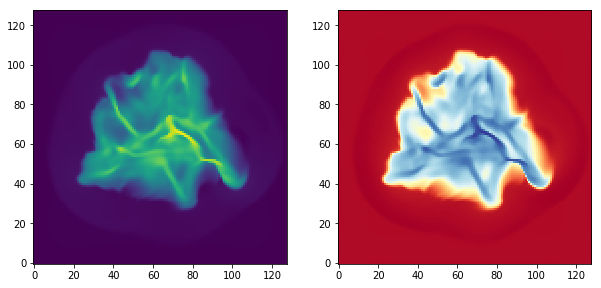

In [25]:
iz = ds.domain['Nx'][2] // 2
fig, axes = plt.subplots(1, 2, figsize=(10,5))
cmap_temp = pa.cmap_shift(mpl.cm.RdYlBu_r, midpoint=3.0/7.0)
axes[0].imshow(dat['density'][iz,:,:], norm=LogNorm(), origin='lower')
axes[1].imshow(dat['temperature'][iz,:,:], norm=LogNorm(), origin='lower', 
               cmap=cmap_temp)

__With ``xarray=True`` option, read dataset as a xarray DataSet__

__See http://xarray.pydata.org/en/stable/quick-overview.html for a quick demonstration__

In [26]:
dat = ds.get_field(['density', 'temperature'], as_xarray=True)

In [27]:
dat

<xarray.Dataset>
Dimensions:      (x: 128, y: 128, z: 128)
Coordinates:
  * x            (x) float64 -19.84 -19.53 -19.22 -18.91 ... 19.22 19.53 19.84
  * y            (y) float64 -19.84 -19.53 -19.22 -18.91 ... 19.22 19.53 19.84
  * z            (z) float64 -19.84 -19.53 -19.22 -18.91 ... 19.22 19.53 19.84
Data variables:
    density      (z, y, x) float32 0.6546541 0.6552311 ... 0.65515816 0.65457916
    temperature  (z, y, x) float32 2753.3438 2752.2551 ... 2752.1624 2753.2495
Attributes:
    domain:   {'all_grid_equal': True, 'ngrid': 64, 'le': array([-20., -20., ...

In [28]:
dat.x

<xarray.DataArray 'x' (x: 128)>
array([-19.84375, -19.53125, -19.21875, -18.90625, -18.59375, -18.28125,
       -17.96875, -17.65625, -17.34375, -17.03125, -16.71875, -16.40625,
       -16.09375, -15.78125, -15.46875, -15.15625, -14.84375, -14.53125,
       -14.21875, -13.90625, -13.59375, -13.28125, -12.96875, -12.65625,
       -12.34375, -12.03125, -11.71875, -11.40625, -11.09375, -10.78125,
       -10.46875, -10.15625,  -9.84375,  -9.53125,  -9.21875,  -8.90625,
        -8.59375,  -8.28125,  -7.96875,  -7.65625,  -7.34375,  -7.03125,
        -6.71875,  -6.40625,  -6.09375,  -5.78125,  -5.46875,  -5.15625,
        -4.84375,  -4.53125,  -4.21875,  -3.90625,  -3.59375,  -3.28125,
        -2.96875,  -2.65625,  -2.34375,  -2.03125,  -1.71875,  -1.40625,
        -1.09375,  -0.78125,  -0.46875,  -0.15625,   0.15625,   0.46875,
         0.78125,   1.09375,   1.40625,   1.71875,   2.03125,   2.34375,
         2.65625,   2.96875,   3.28125,   3.59375,   3.90625,   4.21875,
         4.53125,  

__get_slice() method__

In [29]:
help(ds.get_slice)

Help on method get_slice in module pyathena.io.read_vtk:

get_slice(axis, field='density', pos='c', method='nearest') method of pyathena.io.read_vtk.AthenaDataSet instance
    Read fields data.
    
    Parameters
    ----------
    axis : str
        Axis to slice along. 'x' or 'y' or 'z'
    field : (list of) str
        The name of the field(s) to be read.
    pos : float or str
        Slice through If 'c' or 'center', get a slice through the domain
        center. Default value is 'c'.
    method : str
    
    Returns
    -------
    slc : xarray dataset
        An xarray dataset containing slices.



In [30]:
slc = ds.get_slice('z', ['density', 'temperature', 'pressure'])

In [31]:
slc

<xarray.Dataset>
Dimensions:      (x: 128, y: 128)
Coordinates:
  * x            (x) float64 -19.84 -19.53 -19.22 -18.91 ... 19.22 19.53 19.84
  * y            (y) float64 -19.84 -19.53 -19.22 -18.91 ... 19.22 19.53 19.84
    z            float64 0.1562
Data variables:
    density      (y, x) float32 0.6519747 0.65298605 ... 0.6530518 0.6520349
    temperature  (y, x) float32 2753.9338 2752.022 ... 2752.1035 2754.0151
    pressure     (y, x) float32 11.440019 11.449812 ... 11.4513035 11.441414
Attributes:
    domain:   {'all_grid_equal': True, 'ngrid': 64, 'le': array([-20., -20., ...

In [32]:
slc.domain

{'all_grid_equal': True,
 'ngrid': 64,
 'le': array([-20., -20., -20.], dtype=float32),
 're': array([20., 20., 20.], dtype=float32),
 'dx': array([0.3125, 0.3125, 0.3125], dtype=float32),
 'Lx': array([40., 40., 40.], dtype=float32),
 'center': array([0., 0., 0.], dtype=float32),
 'Nx': array([128, 128, 128]),
 'ndim': 3,
 'time': 1.508373}

In [33]:
type(slc), type(slc.density), type(slc.density.data)

(xarray.core.dataset.Dataset, xarray.core.dataarray.DataArray, numpy.ndarray)

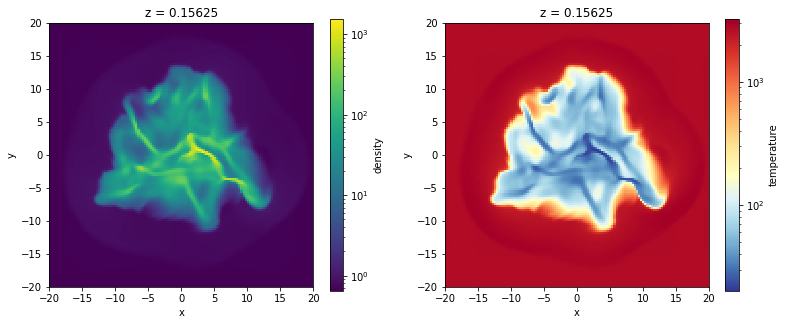

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
im1 = slc['density'].plot(ax=axes[0], norm=LogNorm())
im2 = slc['temperature'].plot(ax=axes[1], norm=LogNorm(), cmap=cmap_temp)
for im in (im1, im2):
    im.axes.set_aspect('equal')

## 2d histogram

Text(0, 0.5, '$\\log_{10}\\,T$')

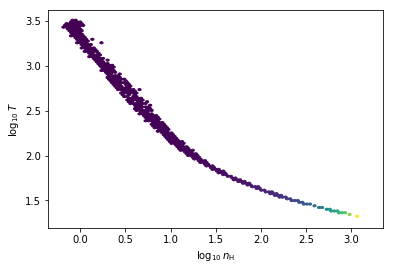

In [35]:
nH = slc['density'].data.flatten()
lognH = np.log10(nH)
logT = np.log10(slc['temperature'].data.flatten())
plt.hexbin(lognH, logT, nH, mincnt=1)
plt.xlabel(r'$\log_{10}\,n_{\rm H}$')
plt.ylabel(r'$\log_{10}\,T$')